#  David Vaughan  R1166390
# (MATH-4000-004)
# Homework 7 03/08/2023
#  Spring 2023 TTU Selected Topics: Machine learning model order reduction for differential equations (MATH-4000-004) Full Term: Homework for week  (due 03/08)

### Problem 1

Read the code in the lecture note "lecture-06-part2-ResNet". Change the number of layers to 10, 30, 50, 70 for both the ResNet and Feedforward Neural Network (FNN). Compare the performance of ResNet and FNN, and report your observation. (You should be able to see that ResNet outperforms FNN when the number of layers is very large.)


## Residual Neural Network (ResNet)
- ResNet is proposed in this paper:
He, Zhang, Ren, and Sun (2016). Deep Residual Learning for Image Recognition. 2016. CVPR (cited >150k).

- Motivation: vanishing gradient problem when the number of layers is too large

### architecture:
- Original Feedforward Neural Network:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

- ResNet:
$$
\begin{aligned}
z^{(1)} &= x, \\
z^{(i+1)} &= z^{(i)} + \sigma(W^{(i)} z^{(i)} + b^{(i)}), \quad i=1,2,\cdots,L, \\
y &= W^{(L+1)} z^{(L+1)} + b^{(L+1)}
\end{aligned}
$$

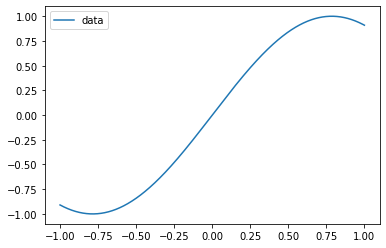

In [1]:
# install pytorch

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

N = 10000
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(2*x_data)

plt.figure()
plt.plot(x_data, y_data, '-', label='data')
plt.legend()
plt.show()



In [2]:
#Res Net
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
#Res Net
# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):

                z = z + self.act_func(self.layers[i](z))
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN_Orginal(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN_Orginal, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):
                # hidden layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                # nonlinear layer: z = sigma(z)
                z = self.act_func(z)
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

layers size 10
epoch: 0; MSE: 5.96e-01; elapsed time: 0.20 sec
epoch: 1000; MSE: 1.48e-05; elapsed time: 13.22 sec
epoch: 2000; MSE: 1.98e-06; elapsed time: 21.75 sec
epoch: 3000; MSE: 1.90e-06; elapsed time: 25.90 sec
epoch: 4000; MSE: 1.68e-05; elapsed time: 30.09 sec
epoch: 5000; MSE: 2.31e-06; elapsed time: 35.25 sec
epoch: 6000; MSE: 7.24e-05; elapsed time: 39.55 sec
epoch: 7000; MSE: 1.51e-04; elapsed time: 44.46 sec
epoch: 8000; MSE: 2.90e-07; elapsed time: 49.20 sec
epoch: 9000; MSE: 2.41e-07; elapsed time: 53.43 sec


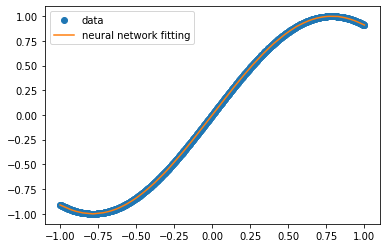

layers size 30
epoch: 0; MSE: 6.21e-01; elapsed time: 0.01 sec
epoch: 1000; MSE: 5.95e-01; elapsed time: 13.59 sec
epoch: 2000; MSE: 5.95e-01; elapsed time: 27.31 sec
epoch: 3000; MSE: 5.95e-01; elapsed time: 41.02 sec
epoch: 4000; MSE: 5.95e-01; elapsed time: 54.91 sec
epoch: 5000; MSE: 5.95e-01; elapsed time: 68.42 sec
epoch: 6000; MSE: 5.95e-01; elapsed time: 81.87 sec
epoch: 7000; MSE: 5.95e-01; elapsed time: 96.12 sec
epoch: 8000; MSE: 2.05e-04; elapsed time: 110.06 sec
epoch: 9000; MSE: 2.24e-06; elapsed time: 125.08 sec


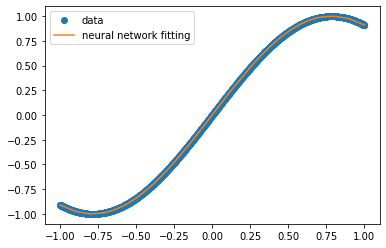

layers size 50
epoch: 0; MSE: 5.98e-01; elapsed time: 0.03 sec
epoch: 1000; MSE: 5.95e-01; elapsed time: 22.23 sec
epoch: 2000; MSE: 5.95e-01; elapsed time: 45.08 sec
epoch: 3000; MSE: 5.95e-01; elapsed time: 68.12 sec
epoch: 4000; MSE: 5.95e-01; elapsed time: 91.12 sec
epoch: 5000; MSE: 5.95e-01; elapsed time: 113.16 sec
epoch: 6000; MSE: 5.95e-01; elapsed time: 136.29 sec
epoch: 7000; MSE: 5.95e-01; elapsed time: 159.46 sec
epoch: 8000; MSE: 5.95e-01; elapsed time: 183.71 sec
epoch: 9000; MSE: 5.95e-01; elapsed time: 206.92 sec


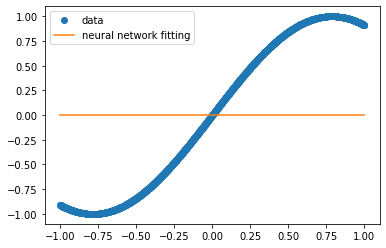

layers size 70
epoch: 0; MSE: 6.19e-01; elapsed time: 0.03 sec
epoch: 1000; MSE: 5.95e-01; elapsed time: 31.98 sec
epoch: 2000; MSE: 5.95e-01; elapsed time: 62.71 sec
epoch: 3000; MSE: 5.95e-01; elapsed time: 97.45 sec
epoch: 4000; MSE: 5.95e-01; elapsed time: 128.56 sec
epoch: 5000; MSE: 5.95e-01; elapsed time: 161.74 sec
epoch: 6000; MSE: 5.95e-01; elapsed time: 192.67 sec
epoch: 7000; MSE: 5.95e-01; elapsed time: 224.94 sec
epoch: 8000; MSE: 5.95e-01; elapsed time: 256.13 sec
epoch: 9000; MSE: 5.95e-01; elapsed time: 287.88 sec


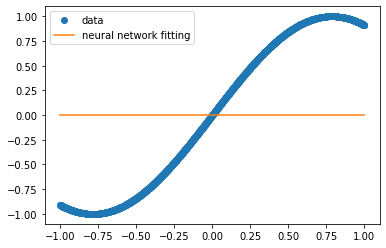

In [4]:
# Orginal FNN
layers = 10
storag1 =[]
for i in range(4):
  print("layers size",layers)
  fcn = FNN_Orginal(input_size=1, output_size=1, num_layers=layers, hidden_size=32, activiation='relu')

  criterion = torch.nn.MSELoss()

  optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

  total_epoch = 10000

  # record time
  time_start = time.time()
  for epoch in range(total_epoch):

      optimizer.zero_grad()

      loss = criterion(fcn(x_data), y_data)

      loss.backward()
      
      optimizer.step()

      if epoch%1000 == 0:
          time_end = time.time()
          print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
          storag1.append((epoch, loss.item(), time_end-time_start))

  # plot
  plt.figure()
  plt.plot(x_data, y_data, 'o', label='data')
  plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
  plt.legend()
  plt.show()
  layers += 20

In [5]:
print("storage 1 is",storag1)

storage 1 is [(0, 0.5955513715744019, 0.19944095611572266), (1000, 1.475004683015868e-05, 13.222286939620972), (2000, 1.977432930289069e-06, 21.753010988235474), (3000, 1.9030939029107685e-06, 25.899821519851685), (4000, 1.6777166820247658e-05, 30.088515758514404), (5000, 2.3098962174117332e-06, 35.251078605651855), (6000, 7.23887060303241e-05, 39.54574418067932), (7000, 0.00015097144932951778, 44.46265745162964), (8000, 2.904800169289956e-07, 49.20289206504822), (9000, 2.40668754258877e-07, 53.432936668395996), (0, 0.6206887364387512, 0.014983654022216797), (1000, 0.5948320031166077, 13.593399286270142), (2000, 0.5948320031166077, 27.31452178955078), (3000, 0.5948320031166077, 41.01840424537659), (4000, 0.5948320031166077, 54.90654373168945), (5000, 0.5948320031166077, 68.41575193405151), (6000, 0.5948320031166077, 81.87203168869019), (7000, 0.5948320031166077, 96.12201976776123), (8000, 0.00020532282360363752, 110.0636990070343), (9000, 2.2420501863962272e-06, 125.08140110969543), (0

epoch: 0; MSE: 1.63e+01; elapsed time: 0.01 sec
epoch: 1000; MSE: 2.67e-04; elapsed time: 5.31 sec
epoch: 2000; MSE: 5.92e-05; elapsed time: 11.06 sec
epoch: 3000; MSE: 1.69e-05; elapsed time: 16.17 sec
epoch: 4000; MSE: 5.84e-06; elapsed time: 22.18 sec
epoch: 5000; MSE: 2.64e-06; elapsed time: 27.34 sec
epoch: 6000; MSE: 4.72e-03; elapsed time: 33.21 sec
epoch: 7000; MSE: 6.72e-06; elapsed time: 38.17 sec
epoch: 8000; MSE: 3.63e-05; elapsed time: 44.05 sec
epoch: 9000; MSE: 1.70e-06; elapsed time: 50.43 sec


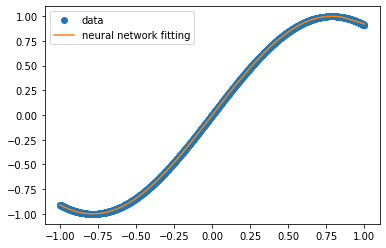

epoch: 0; MSE: 2.82e+03; elapsed time: 0.02 sec
epoch: 1000; MSE: 1.68e-04; elapsed time: 16.70 sec
epoch: 2000; MSE: 9.23e-05; elapsed time: 32.77 sec
epoch: 3000; MSE: 4.58e-05; elapsed time: 48.74 sec
epoch: 4000; MSE: 2.02e-05; elapsed time: 64.74 sec
epoch: 5000; MSE: 1.16e-05; elapsed time: 81.70 sec
epoch: 6000; MSE: 9.38e-06; elapsed time: 98.39 sec
epoch: 7000; MSE: 1.13e-05; elapsed time: 122.83 sec
epoch: 8000; MSE: 2.87e-05; elapsed time: 138.73 sec
epoch: 9000; MSE: 7.34e-05; elapsed time: 154.65 sec


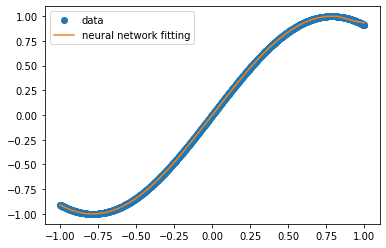

epoch: 0; MSE: 1.26e+07; elapsed time: 0.02 sec
epoch: 1000; MSE: 1.02e-03; elapsed time: 27.89 sec
epoch: 2000; MSE: 1.66e-04; elapsed time: 54.74 sec
epoch: 3000; MSE: 1.38e-04; elapsed time: 81.59 sec
epoch: 4000; MSE: 4.53e-05; elapsed time: 108.20 sec
epoch: 5000; MSE: 3.28e-05; elapsed time: 134.85 sec
epoch: 6000; MSE: 3.54e-05; elapsed time: 161.67 sec
epoch: 7000; MSE: 2.69e-05; elapsed time: 188.46 sec
epoch: 8000; MSE: 4.54e-05; elapsed time: 215.33 sec
epoch: 9000; MSE: 7.40e-04; elapsed time: 243.82 sec


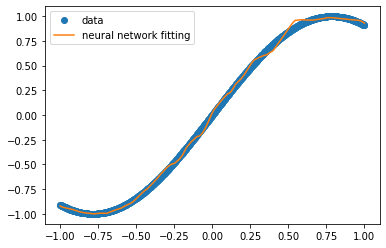

epoch: 0; MSE: 1.63e+11; elapsed time: 0.04 sec
epoch: 1000; MSE: 8.60e+00; elapsed time: 37.47 sec
epoch: 2000; MSE: 4.50e-02; elapsed time: 74.88 sec
epoch: 3000; MSE: 2.87e-02; elapsed time: 112.12 sec
epoch: 4000; MSE: 1.85e-02; elapsed time: 152.58 sec
epoch: 5000; MSE: 1.12e-02; elapsed time: 191.11 sec
epoch: 6000; MSE: 2.70e-02; elapsed time: 228.07 sec
epoch: 7000; MSE: 1.27e-02; elapsed time: 265.20 sec
epoch: 8000; MSE: 1.54e+00; elapsed time: 302.79 sec
epoch: 9000; MSE: 6.20e-02; elapsed time: 340.35 sec


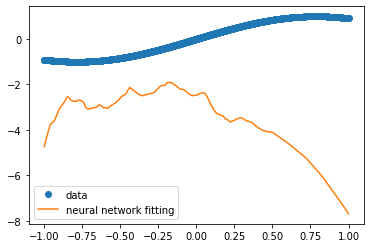

In [6]:
#### Res Net
layers = 10
storag2 =[]
for i in range(4):

  fcn = FNN(input_size=1, output_size=1, num_layers=layers, hidden_size=32, activiation='relu')

  criterion = torch.nn.MSELoss()

  optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

  total_epoch = 10000

  # record time
  time_start = time.time()
  for epoch in range(total_epoch):

      optimizer.zero_grad()

      loss = criterion(fcn(x_data), y_data)

      loss.backward()
      
      optimizer.step()

      if epoch%1000 == 0:
          time_end = time.time()
          print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))
          storag2.append((epoch, loss.item(), time_end-time_start))


  # plot
  plt.figure()
  plt.plot(x_data, y_data, 'o', label='data')
  plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
  plt.legend()
  plt.show()
  layers += 20

In [7]:
print("storage 2 is",storag2)

storage 2 is [(0, 16.267099380493164, 0.006591081619262695), (1000, 0.00026674068067222834, 5.3108069896698), (2000, 5.918210081290454e-05, 11.061909437179565), (3000, 1.693079320830293e-05, 16.166771411895752), (4000, 5.840101948706433e-06, 22.179829359054565), (5000, 2.6398245154268807e-06, 27.3362820148468), (6000, 0.004721418023109436, 33.211498498916626), (7000, 6.720059900544584e-06, 38.172080516815186), (8000, 3.628081321949139e-05, 44.048078775405884), (9000, 1.7044334299498587e-06, 50.425018548965454), (0, 2820.370361328125, 0.017019987106323242), (1000, 0.00016780462465249002, 16.698320865631104), (2000, 9.225457324646413e-05, 32.773808002471924), (3000, 4.5764063543174416e-05, 48.73854422569275), (4000, 2.022285661951173e-05, 64.74426865577698), (5000, 1.1554137927305419e-05, 81.70464420318604), (6000, 9.377732567372732e-06, 98.39379477500916), (7000, 1.1310892659821548e-05, 122.83028531074524), (8000, 2.872653021768201e-05, 138.72910404205322), (9000, 7.344738696701825e-05,